In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from statsmodels.stats import multitest
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
from scipy.stats import ttest_rel

data_PB1 = pd.read_csv("PB1_MG_NEP_12.01.23.csv")
data_PB1.head()

,Strand,Target,Condition,Replicate,Value
0,PB1,200nt,NoNS2,1,6.2301
1,PB1,200nt,NoNS2,2,6.2864
2,PB1,200nt,NoNS2,3,6.0682
3,PB1,400nt,NoNS2,1,4.3622
4,PB1,400nt,NoNS2,2,4.2364


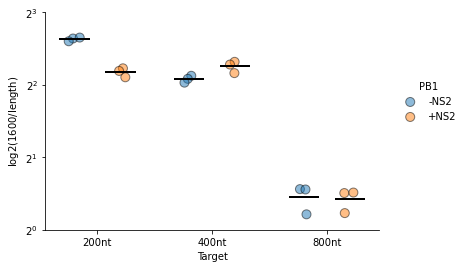

In [2]:
nameOrder = ['200nt','400nt', '800nt']
ax=sns.stripplot(data = data_PB1, x='Target', y='Value', edgecolor='black', 
           jitter=True, dodge=True, linewidth=1, s=9, hue="Condition", hue_order=['NoNS2','NS2'], alpha = 0.5)

sns.despine()
ax.legend( ['-NS2','+NS2'], bbox_to_anchor=(1.05, 0.7), loc=2, borderaxespad=0.,frameon=False, title='PB1')

plt.ylabel('log$2$(1600/length)')
ax.set_yscale('log', base=2)
ax.set_ylim(1,8)

for legend_handle in ax.get_legend().legendHandles:  
       legend_handle.set_edgecolor('black')
    
for position, target in enumerate(['200nt', '400nt', '800nt']):
    y = data_PB1[(data_PB1.Condition == 'NoNS2') & (data_PB1.Target == target)].Value.mean()
    plt.plot([position-0.325, position-0.075], [y, y], lw=2, c='k', zorder=5)
    y = data_PB1[(data_PB1.Condition == 'NS2') & (data_PB1.Target == target)].Value.mean()
    plt.plot([position+0.075, position+0.325], [y, y], lw=2, c='k', zorder=5)   



0.00021674446429331923
0.03465180001508058
0.8450574865308237


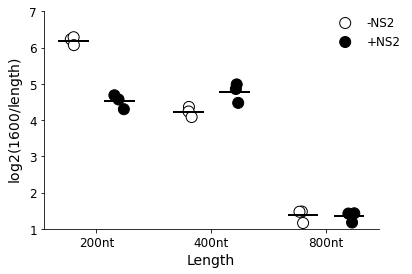

In [26]:
nameOrder = ['200nt','400nt', '800nt']

ax=sns.stripplot(data = data_PB1, x='Target', y='Value', edgecolor='black', 
           jitter=True, dodge=True, linewidth=1, s=11, hue="Condition", hue_order=['NoNS2','NS2'], palette=['1','0'], alpha = 1)

sns.despine()
ax.legend( ['-NS2','+NS2'], bbox_to_anchor=(0.85, 1), loc=2, fontsize = 12, borderaxespad=0.,frameon=False)

plt.ylabel('log$2$(1600/length)', size=14)
plt.ylim(1,7)
plt.yticks(fontsize=12)
plt.xlabel('Length', size = 14)
plt.xticks(fontsize=12)

for legend_handle in ax.get_legend().legendHandles:  
       legend_handle.set_edgecolor('black')
    
for position, target in enumerate(['200nt', '400nt', '800nt']):
    y = data_PB1[(data_PB1.Condition == 'NoNS2') & (data_PB1.Target == target)].Value.mean()
    plt.plot([position-0.325, position-0.075], [y, y], lw=2, c='k', zorder=5)
    y = data_PB1[(data_PB1.Condition == 'NS2') & (data_PB1.Target == target)].Value.mean()
    plt.plot([position+0.075, position+0.325], [y, y], lw=2, c='k', zorder=5)
    
#Independent t-test
Size_200_NoNS2=data_PB1[(data_PB1.Condition == 'NoNS2') & (data_PB1.Target == '200nt' )].Value
Size_200_NS2=data_PB1[(data_PB1.Condition == 'NS2') & (data_PB1.Target == '200nt')].Value
t_stat, p_val_1 = stats.ttest_ind(Size_200_NoNS2, Size_200_NS2)
print (p_val_1)

Size_400_NoNS2=data_PB1[(data_PB1.Condition == 'NoNS2') & (data_PB1.Target == '400nt' )].Value
Size_400_NS2=data_PB1[(data_PB1.Condition == 'NS2') & (data_PB1.Target == '400nt')].Value
t_stat, p_val_2 = stats.ttest_ind(Size_400_NoNS2, Size_400_NS2)
print (p_val_2)

Size_800_NoNS2=data_PB1[(data_PB1.Condition == 'NoNS2') & (data_PB1.Target == '800nt' )].Value
Size_800_NS2=data_PB1[(data_PB1.Condition == 'NS2') & (data_PB1.Target == '800nt')].Value
t_stat, p_val_2 = stats.ttest_ind(Size_800_NoNS2, Size_800_NS2)
print (p_val_2)

plt.savefig('Figures/PB1_Segment.pdf', format='pdf', bbox_inches = "tight")



In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from statsmodels.stats import multitest
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
from scipy.stats import ttest_rel

data_HA = pd.read_csv("HA_MG_NEP_2.21.24.csv")
data_HA.head()

,Strand,Target,Condition,Replicate,Value
0,HA,200nt,NoNS2,1,8.23
1,HA,200nt,NoNS2,2,8.20
2,HA,200nt,NoNS2,3,8.23
3,HA,400nt,NoNS2,1,6.39
4,HA,400nt,NoNS2,2,6.38


0.16674260781197583
0.19066420022281086
0.19603056558366388


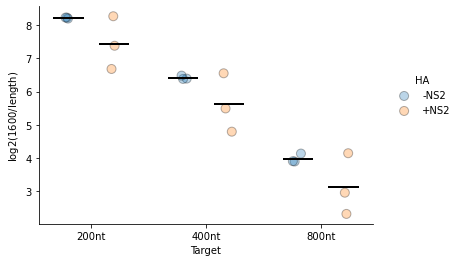

In [18]:
nameOrder = ['200nt','400nt', '800nt']
ax=sns.stripplot(data = data_HA, x='Target', y='Value', edgecolor='black', 
           jitter=True, dodge=True, linewidth=1, s=9, hue="Condition", hue_order=['NoNS2','NS2'],  alpha = 0.3)

sns.despine()
ax.legend( ['-NS2','+NS2'], bbox_to_anchor=(1.05, 0.7), loc=2, borderaxespad=0.,frameon=False, title='HA')

plt.ylabel('log$2$(1600/length)')

for legend_handle in ax.get_legend().legendHandles:  
       legend_handle.set_edgecolor('black')
    
for position, target in enumerate(['200nt', '400nt', '800nt']):
    y = data_HA[(data_HA.Condition == 'NoNS2') & (data_HA.Target == target)].Value.mean()
    plt.plot([position-0.325, position-0.075], [y, y], lw=2, c='k', zorder=5)
    y = data_HA[(data_HA.Condition == 'NS2') & (data_HA.Target == target)].Value.mean()
    plt.plot([position+0.075, position+0.325], [y, y], lw=2, c='k', zorder=5)
    
#Independent t-test
Size_200_NoNS2=data_HA[(data_HA.Condition == 'NoNS2') & (data_HA.Target == '200nt' )].Value
Size_200_NS2=data_HA[(data_HA.Condition == 'NS2') & (data_HA.Target == '200nt')].Value
t_stat, p_val_1 = stats.ttest_ind(Size_200_NoNS2, Size_200_NS2)
print (p_val_1)

Size_400_NoNS2=data_HA[(data_HA.Condition == 'NoNS2') & (data_HA.Target == '400nt' )].Value
Size_400_NS2=data_HA[(data_HA.Condition == 'NS2') & (data_HA.Target == '400nt')].Value
t_stat, p_val_2 = stats.ttest_ind(Size_400_NoNS2, Size_400_NS2)
print (p_val_2)

Size_800_NoNS2=data_HA[(data_HA.Condition == 'NoNS2') & (data_HA.Target == '800nt' )].Value
Size_800_NS2=data_HA[(data_HA.Condition == 'NS2') & (data_HA.Target == '800nt')].Value
t_stat, p_val_3 = stats.ttest_ind(Size_800_NoNS2, Size_800_NS2)
print (p_val_3)



In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from statsmodels.stats import multitest
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
from scipy.stats import ttest_rel

data_HA = pd.read_csv("HA_MG_NEP_12.7.23.csv")
data_HA.head()

,Strand,Target,Condition,Replicate,Value
0,HA,200nt,NoNS2,1,7.97
1,HA,200nt,NoNS2,2,8.05
2,HA,200nt,NoNS2,3,8.24
3,HA,400nt,NoNS2,1,5.91
4,HA,400nt,NoNS2,2,5.99


0.0006382307723046885
8.744424305560528e-05
0.0002766193825095831


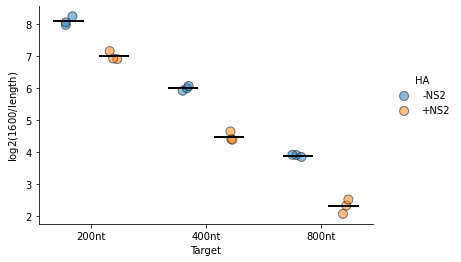

In [24]:
nameOrder = ['200nt','400nt', '800nt']
ax=sns.stripplot(data = data_HA, x='Target', y='Value', edgecolor='black', 
           jitter=True, dodge=True, linewidth=1, s=9, hue="Condition", hue_order=['NoNS2','NS2'],  alpha = 0.5)

sns.despine()
ax.legend( ['-NS2','+NS2'], bbox_to_anchor=(1.05, 0.7), loc=2, borderaxespad=0.,frameon=False, title='HA')

plt.ylabel('log$2$(1600/length)')

for legend_handle in ax.get_legend().legendHandles:  
       legend_handle.set_edgecolor('black')
    
for position, target in enumerate(['200nt', '400nt', '800nt']):
    y = data_HA[(data_HA.Condition == 'NoNS2') & (data_HA.Target == target)].Value.mean()
    plt.plot([position-0.325, position-0.075], [y, y], lw=2, c='k', zorder=5)
    y = data_HA[(data_HA.Condition == 'NS2') & (data_HA.Target == target)].Value.mean()
    plt.plot([position+0.075, position+0.325], [y, y], lw=2, c='k', zorder=5)
    
#Independent t-test
Size_200_NoNS2=data_HA[(data_HA.Condition == 'NoNS2') & (data_HA.Target == '200nt' )].Value
Size_200_NS2=data_HA[(data_HA.Condition == 'NS2') & (data_HA.Target == '200nt')].Value
t_stat, p_val_1 = stats.ttest_ind(Size_200_NoNS2, Size_200_NS2)
print (p_val_1)

Size_400_NoNS2=data_HA[(data_HA.Condition == 'NoNS2') & (data_HA.Target == '400nt' )].Value
Size_400_NS2=data_HA[(data_HA.Condition == 'NS2') & (data_HA.Target == '400nt')].Value
t_stat, p_val_2 = stats.ttest_ind(Size_400_NoNS2, Size_400_NS2)
print (p_val_2)

Size_800_NoNS2=data_HA[(data_HA.Condition == 'NoNS2') & (data_HA.Target == '800nt' )].Value
Size_800_NS2=data_HA[(data_HA.Condition == 'NS2') & (data_HA.Target == '800nt')].Value
t_stat, p_val_3 = stats.ttest_ind(Size_800_NoNS2, Size_800_NS2)
print (p_val_3)

plt.savefig('Figures/HA_Segment.pdf', format='pdf', bbox_inches = "tight")



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from statsmodels.stats import multitest
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
from scipy.stats import ttest_rel

data_PB2 = pd.read_csv("PB2_MG_NEP.csv")
data_PB2.head()

,Strand,Target,Condition,Replicate,Value
0,PB2,200nt,NoNS2,1,3.9900
1,PB2,200nt,NoNS2,2,3.9400
2,PB2,200nt,NoNS2,3,4.0100
3,PB2,200nt,NoNS2,4,4.1400
4,PB2,200nt,NoNS2,5,4.4828


3.289450890456795e-05
0.2895331764939351
0.9675034505079351


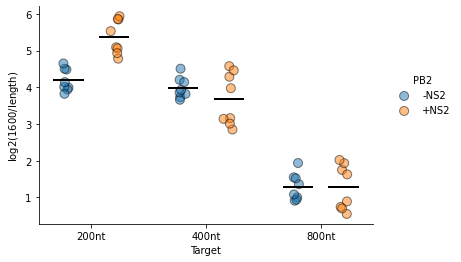

In [3]:
nameOrder = ['200nt','400nt', '800nt']
ax=sns.stripplot(data = data_PB2, x='Target', y='Value', edgecolor='black', 
           jitter=True, dodge=True, linewidth=1, s=9, hue="Condition", hue_order=['NoNS2','NS2'],  alpha = 0.5)

sns.despine()
ax.legend( ['-NS2','+NS2'], bbox_to_anchor=(1.05, 0.7), loc=2, borderaxespad=0.,frameon=False, title='PB2')

plt.ylabel('log$2$(1600/length)')

for legend_handle in ax.get_legend().legendHandles:  
       legend_handle.set_edgecolor('black')
    
for position, target in enumerate(['200nt', '400nt', '800nt']):
    y = data_PB2[(data_PB2.Condition == 'NoNS2') & (data_PB2.Target == target)].Value.mean()
    plt.plot([position-0.325, position-0.075], [y, y], lw=2, c='k', zorder=5)
    y = data_PB2[(data_PB2.Condition == 'NS2') & (data_PB2.Target == target)].Value.mean()
    plt.plot([position+0.075, position+0.325], [y, y], lw=2, c='k', zorder=5)
    
#Independent t-test
Size_200_NoNS2=data_PB2[(data_PB2.Condition == 'NoNS2') & (data_PB2.Target == '200nt' )].Value
Size_200_NS2=data_PB2[(data_PB2.Condition == 'NS2') & (data_PB2.Target == '200nt')].Value
t_stat, p_val_1 = stats.ttest_ind(Size_200_NoNS2, Size_200_NS2)
print (p_val_1)

Size_400_NoNS2=data_PB2[(data_PB2.Condition == 'NoNS2') & (data_PB2.Target == '400nt' )].Value
Size_400_NS2=data_PB2[(data_PB2.Condition == 'NS2') & (data_PB2.Target == '400nt')].Value
t_stat, p_val_2 = stats.ttest_ind(Size_400_NoNS2, Size_400_NS2)
print (p_val_2)

Size_800_NoNS2=data_PB2[(data_PB2.Condition == 'NoNS2') & (data_PB2.Target == '800nt' )].Value
Size_800_NS2=data_PB2[(data_PB2.Condition == 'NS2') & (data_PB2.Target == '800nt')].Value
t_stat, p_val_3 = stats.ttest_ind(Size_800_NoNS2, Size_800_NS2)
print (p_val_3)

plt.savefig('Figures/PB2_Segment_6rep.pdf', format='pdf', bbox_inches = "tight")


0.00195421984134647
0.003669140899004906
0.06576353180562865


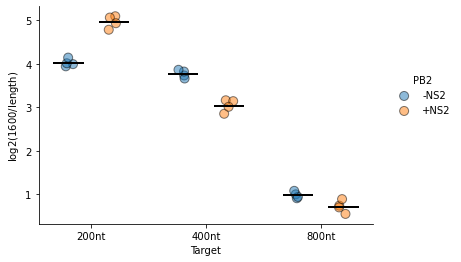

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from statsmodels.stats import multitest
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
from scipy.stats import ttest_rel

data_PB2 = pd.read_csv("PB2_MG_NEP_4rep.csv")
data_PB2.head()
nameOrder = ['200nt','400nt', '800nt']
ax=sns.stripplot(data = data_PB2, x='Target', y='Value', edgecolor='black', 
           jitter=True, dodge=True, linewidth=1, s=9, hue="Condition", hue_order=['NoNS2','NS2'],  alpha = 0.5)

sns.despine()
ax.legend( ['-NS2','+NS2'], bbox_to_anchor=(1.05, 0.7), loc=2, borderaxespad=0.,frameon=False, title='PB2')

plt.ylabel('log$2$(1600/length)')

for legend_handle in ax.get_legend().legendHandles:  
       legend_handle.set_edgecolor('black')
    
for position, target in enumerate(['200nt', '400nt', '800nt']):
    y = data_PB2[(data_PB2.Condition == 'NoNS2') & (data_PB2.Target == target)].Value.mean()
    plt.plot([position-0.325, position-0.075], [y, y], lw=2, c='k', zorder=5)
    y = data_PB2[(data_PB2.Condition == 'NS2') & (data_PB2.Target == target)].Value.mean()
    plt.plot([position+0.075, position+0.325], [y, y], lw=2, c='k', zorder=5)
    
#Independent t-test
Size_200_NoNS2=data_PB2[(data_PB2.Condition == 'NoNS2') & (data_PB2.Target == '200nt' )].Value
Size_200_NS2=data_PB2[(data_PB2.Condition == 'NS2') & (data_PB2.Target == '200nt')].Value
t_stat, p_val_1 = stats.ttest_rel(Size_200_NoNS2, Size_200_NS2)
print (p_val_1)

Size_400_NoNS2=data_PB2[(data_PB2.Condition == 'NoNS2') & (data_PB2.Target == '400nt' )].Value
Size_400_NS2=data_PB2[(data_PB2.Condition == 'NS2') & (data_PB2.Target == '400nt')].Value
t_stat, p_val_2 = stats.ttest_rel(Size_400_NoNS2, Size_400_NS2)
print (p_val_2)

Size_800_NoNS2=data_PB2[(data_PB2.Condition == 'NoNS2') & (data_PB2.Target == '800nt' )].Value
Size_800_NS2=data_PB2[(data_PB2.Condition == 'NS2') & (data_PB2.Target == '800nt')].Value
t_stat, p_val_3 = stats.ttest_rel(Size_800_NoNS2, Size_800_NS2)
print (p_val_3)

plt.savefig('Figures/PB2_Segment.pdf', format='pdf', bbox_inches = "tight")


0.2574916282284425
0.5331793345576443
0.10315108114985094


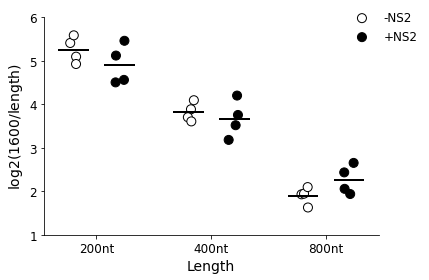

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from statsmodels.stats import multitest
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
from scipy.stats import ttest_rel

data_PB2 = pd.read_csv("PA_MG_NEP_4.22.24.csv")
data_PB2.head()
nameOrder = ['200nt','400nt', '800nt']
ax=sns.stripplot(data = data_PB2, x='Target', y='Value', 
           jitter=True, dodge=True, linewidth=1, s=9, hue="Condition", hue_order=['NoNS2','NS2'], palette=['1','0'], alpha = 1)

sns.despine()
ax.legend( ['-NS2','+NS2'], bbox_to_anchor=(0.9, 1.05), loc=2, fontsize = 12, borderaxespad=0.,frameon=False)

plt.ylabel('log$2$(1600/length)', size=14)
plt.ylim(1,6)
plt.yticks(fontsize=12)
plt.xlabel('Length', size = 14)
plt.xticks(fontsize=12)

for legend_handle in ax.get_legend().legendHandles:  
       legend_handle.set_edgecolor('black')
    
for position, target in enumerate(['200nt', '400nt', '800nt']):
    y = data_PB2[(data_PB2.Condition == 'NoNS2') & (data_PB2.Target == target)].Value.mean()
    plt.plot([position-0.325, position-0.075], [y, y], lw=2, c='k', zorder=5)
    y = data_PB2[(data_PB2.Condition == 'NS2') & (data_PB2.Target == target)].Value.mean()
    plt.plot([position+0.075, position+0.325], [y, y], lw=2, c='k', zorder=5)
    
#Independent t-test
Size_200_NoNS2=data_PB2[(data_PB2.Condition == 'NoNS2') & (data_PB2.Target == '200nt' )].Value
Size_200_NS2=data_PB2[(data_PB2.Condition == 'NS2') & (data_PB2.Target == '200nt')].Value
t_stat, p_val_1 = stats.ttest_ind(Size_200_NoNS2, Size_200_NS2)
print (p_val_1)

Size_400_NoNS2=data_PB2[(data_PB2.Condition == 'NoNS2') & (data_PB2.Target == '400nt' )].Value
Size_400_NS2=data_PB2[(data_PB2.Condition == 'NS2') & (data_PB2.Target == '400nt')].Value
t_stat, p_val_2 = stats.ttest_ind(Size_400_NoNS2, Size_400_NS2)
print (p_val_2)

Size_800_NoNS2=data_PB2[(data_PB2.Condition == 'NoNS2') & (data_PB2.Target == '800nt' )].Value
Size_800_NS2=data_PB2[(data_PB2.Condition == 'NS2') & (data_PB2.Target == '800nt')].Value
t_stat, p_val_3 = stats.ttest_ind(Size_800_NoNS2, Size_800_NS2)
print (p_val_3)

plt.savefig('Figures/PA_Segment.pdf', format='pdf', bbox_inches = "tight")


0.04022527319716889
0.0033334167566062764
0.007240891910779835


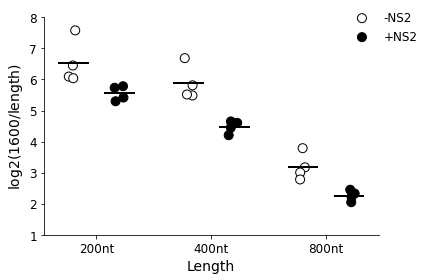

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from statsmodels.stats import multitest
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
from scipy.stats import ttest_rel

data_PB2 = pd.read_csv("NP_MG_NEP_4.22.24.csv")
data_PB2.head()
nameOrder = ['200nt','400nt', '800nt']
ax=sns.stripplot(data = data_PB2, x='Target', y='Value', 
           jitter=True, dodge=True, linewidth=1, s=9, hue="Condition", hue_order=['NoNS2','NS2'], palette=['1','0'], alpha = 1)

sns.despine()
ax.legend( ['-NS2','+NS2'], bbox_to_anchor=(0.9, 1.05), loc=2, fontsize = 12, borderaxespad=0.,frameon=False)

plt.ylabel('log$2$(1600/length)', size=14)
plt.ylim(1,8)
plt.yticks(fontsize=12)
plt.xlabel('Length', size = 14)
plt.xticks(fontsize=12)

for legend_handle in ax.get_legend().legendHandles:  
       legend_handle.set_edgecolor('black')
    
for position, target in enumerate(['200nt', '400nt', '800nt']):
    y = data_PB2[(data_PB2.Condition == 'NoNS2') & (data_PB2.Target == target)].Value.mean()
    plt.plot([position-0.325, position-0.075], [y, y], lw=2, c='k', zorder=5)
    y = data_PB2[(data_PB2.Condition == 'NS2') & (data_PB2.Target == target)].Value.mean()
    plt.plot([position+0.075, position+0.325], [y, y], lw=2, c='k', zorder=5)
    
#Independent t-test
Size_200_NoNS2=data_PB2[(data_PB2.Condition == 'NoNS2') & (data_PB2.Target == '200nt' )].Value
Size_200_NS2=data_PB2[(data_PB2.Condition == 'NS2') & (data_PB2.Target == '200nt')].Value
t_stat, p_val_1 = stats.ttest_ind(Size_200_NoNS2, Size_200_NS2)
print (p_val_1)

Size_400_NoNS2=data_PB2[(data_PB2.Condition == 'NoNS2') & (data_PB2.Target == '400nt' )].Value
Size_400_NS2=data_PB2[(data_PB2.Condition == 'NS2') & (data_PB2.Target == '400nt')].Value
t_stat, p_val_2 = stats.ttest_ind(Size_400_NoNS2, Size_400_NS2)
print (p_val_2)

Size_800_NoNS2=data_PB2[(data_PB2.Condition == 'NoNS2') & (data_PB2.Target == '800nt' )].Value
Size_800_NS2=data_PB2[(data_PB2.Condition == 'NS2') & (data_PB2.Target == '800nt')].Value
t_stat, p_val_3 = stats.ttest_ind(Size_800_NoNS2, Size_800_NS2)
print (p_val_3)

plt.savefig('Figures/NP_Segment.pdf', format='pdf', bbox_inches = "tight")


0.07830101185555917
0.03328003464785316
0.12938025183588103


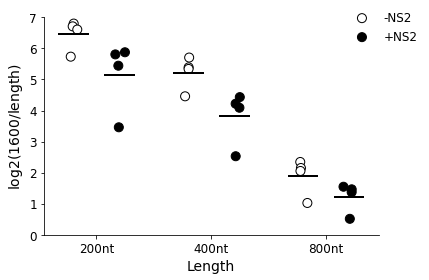

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from statsmodels.stats import multitest
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
from scipy.stats import ttest_rel

data_PB2 = pd.read_csv("NA_MG_NEP_4.22.24.csv")
data_PB2.head()
nameOrder = ['200nt','400nt', '800nt']
ax=sns.stripplot(data = data_PB2, x='Target', y='Value', 
           jitter=True, dodge=True, linewidth=1, s=9, hue="Condition", hue_order=['NoNS2','NS2'], palette=['1','0'], alpha = 1)

sns.despine()
ax.legend( ['-NS2','+NS2'], bbox_to_anchor=(0.9, 1.05), loc=2, fontsize = 12, borderaxespad=0.,frameon=False)

plt.ylabel('log$2$(1600/length)', size=14)
plt.ylim(0,7)
plt.yticks(fontsize=12)
plt.xlabel('Length', size = 14)
plt.xticks(fontsize=12)

for legend_handle in ax.get_legend().legendHandles:  
       legend_handle.set_edgecolor('black')
    
for position, target in enumerate(['200nt', '400nt', '800nt']):
    y = data_PB2[(data_PB2.Condition == 'NoNS2') & (data_PB2.Target == target)].Value.mean()
    plt.plot([position-0.325, position-0.075], [y, y], lw=2, c='k', zorder=5)
    y = data_PB2[(data_PB2.Condition == 'NS2') & (data_PB2.Target == target)].Value.mean()
    plt.plot([position+0.075, position+0.325], [y, y], lw=2, c='k', zorder=5)
    
#Independent t-test
Size_200_NoNS2=data_PB2[(data_PB2.Condition == 'NoNS2') & (data_PB2.Target == '200nt' )].Value
Size_200_NS2=data_PB2[(data_PB2.Condition == 'NS2') & (data_PB2.Target == '200nt')].Value
t_stat, p_val_1 = stats.ttest_ind(Size_200_NoNS2, Size_200_NS2)
print (p_val_1)

Size_400_NoNS2=data_PB2[(data_PB2.Condition == 'NoNS2') & (data_PB2.Target == '400nt' )].Value
Size_400_NS2=data_PB2[(data_PB2.Condition == 'NS2') & (data_PB2.Target == '400nt')].Value
t_stat, p_val_2 = stats.ttest_ind(Size_400_NoNS2, Size_400_NS2)
print (p_val_2)

Size_800_NoNS2=data_PB2[(data_PB2.Condition == 'NoNS2') & (data_PB2.Target == '800nt' )].Value
Size_800_NS2=data_PB2[(data_PB2.Condition == 'NS2') & (data_PB2.Target == '800nt')].Value
t_stat, p_val_3 = stats.ttest_ind(Size_800_NoNS2, Size_800_NS2)
print (p_val_3)

plt.savefig('Figures/NA_Segment.pdf', format='pdf', bbox_inches = "tight")


0.0757407127429892
0.21852342146890696
0.2980325889086364


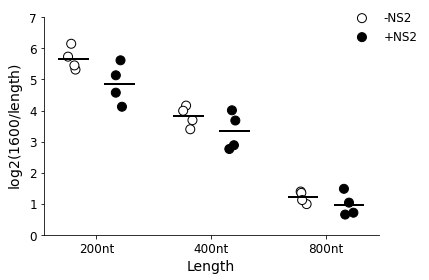

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from statsmodels.stats import multitest
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
from scipy.stats import ttest_rel

data_PB2 = pd.read_csv("M_MG_NEP_5.3.24.csv")
data_PB2.head()
nameOrder = ['200nt','400nt', '800nt']
ax=sns.stripplot(data = data_PB2, x='Target', y='Value', 
           jitter=True, dodge=True, linewidth=1, s=9, hue="Condition", hue_order=['NoNS2','NS2'], palette=['1','0'], alpha = 1)

sns.despine()
ax.legend( ['-NS2','+NS2'], bbox_to_anchor=(0.9, 1.05), loc=2, fontsize = 12, borderaxespad=0.,frameon=False)

plt.ylabel('log$2$(1600/length)', size=14)
plt.ylim(0,7)
plt.yticks(fontsize=12)
plt.xlabel('Length', size = 14)
plt.xticks(fontsize=12)

for legend_handle in ax.get_legend().legendHandles:  
       legend_handle.set_edgecolor('black')
    
for position, target in enumerate(['200nt', '400nt', '800nt']):
    y = data_PB2[(data_PB2.Condition == 'NoNS2') & (data_PB2.Target == target)].Value.mean()
    plt.plot([position-0.325, position-0.075], [y, y], lw=2, c='k', zorder=5)
    y = data_PB2[(data_PB2.Condition == 'NS2') & (data_PB2.Target == target)].Value.mean()
    plt.plot([position+0.075, position+0.325], [y, y], lw=2, c='k', zorder=5)
    
#Independent t-test
Size_200_NoNS2=data_PB2[(data_PB2.Condition == 'NoNS2') & (data_PB2.Target == '200nt' )].Value
Size_200_NS2=data_PB2[(data_PB2.Condition == 'NS2') & (data_PB2.Target == '200nt')].Value
t_stat, p_val_1 = stats.ttest_ind(Size_200_NoNS2, Size_200_NS2)
print (p_val_1)

Size_400_NoNS2=data_PB2[(data_PB2.Condition == 'NoNS2') & (data_PB2.Target == '400nt' )].Value
Size_400_NS2=data_PB2[(data_PB2.Condition == 'NS2') & (data_PB2.Target == '400nt')].Value
t_stat, p_val_2 = stats.ttest_ind(Size_400_NoNS2, Size_400_NS2)
print (p_val_2)

Size_800_NoNS2=data_PB2[(data_PB2.Condition == 'NoNS2') & (data_PB2.Target == '800nt' )].Value
Size_800_NS2=data_PB2[(data_PB2.Condition == 'NS2') & (data_PB2.Target == '800nt')].Value
t_stat, p_val_3 = stats.ttest_ind(Size_800_NoNS2, Size_800_NS2)
print (p_val_3)

plt.savefig('Figures/M_Segment.pdf', format='pdf', bbox_inches = "tight")


0.024394672058756794
0.008197771862828204
0.60110298147137


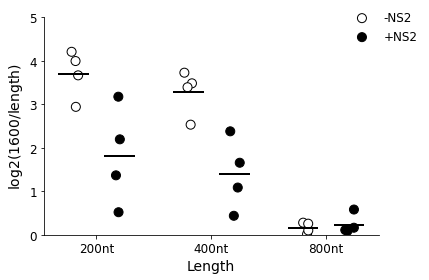

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from statsmodels.stats import multitest
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
from scipy.stats import ttest_rel

data_PB2 = pd.read_csv("NS_MG_NEP_5.3.24.csv")
data_PB2.head()
nameOrder = ['200nt','400nt', '800nt']
ax=sns.stripplot(data = data_PB2, x='Target', y='Value', 
           jitter=True, dodge=True, linewidth=1, s=9, hue="Condition", hue_order=['NoNS2','NS2'], palette=['1','0'], alpha = 1)

sns.despine()
ax.legend( ['-NS2','+NS2'], bbox_to_anchor=(0.9, 1.05), loc=2, fontsize = 12, borderaxespad=0.,frameon=False)

plt.ylabel('log$2$(1600/length)', size=14)
plt.ylim(0,5)
plt.yticks(fontsize=12)
plt.xlabel('Length', size = 14)
plt.xticks(fontsize=12)

for legend_handle in ax.get_legend().legendHandles:  
       legend_handle.set_edgecolor('black')
    
for position, target in enumerate(['200nt', '400nt', '800nt']):
    y = data_PB2[(data_PB2.Condition == 'NoNS2') & (data_PB2.Target == target)].Value.mean()
    plt.plot([position-0.325, position-0.075], [y, y], lw=2, c='k', zorder=5)
    y = data_PB2[(data_PB2.Condition == 'NS2') & (data_PB2.Target == target)].Value.mean()
    plt.plot([position+0.075, position+0.325], [y, y], lw=2, c='k', zorder=5)
    
#Independent t-test
Size_200_NoNS2=data_PB2[(data_PB2.Condition == 'NoNS2') & (data_PB2.Target == '200nt' )].Value
Size_200_NS2=data_PB2[(data_PB2.Condition == 'NS2') & (data_PB2.Target == '200nt')].Value
t_stat, p_val_1 = stats.ttest_ind(Size_200_NoNS2, Size_200_NS2)
print (p_val_1)

Size_400_NoNS2=data_PB2[(data_PB2.Condition == 'NoNS2') & (data_PB2.Target == '400nt' )].Value
Size_400_NS2=data_PB2[(data_PB2.Condition == 'NS2') & (data_PB2.Target == '400nt')].Value
t_stat, p_val_2 = stats.ttest_ind(Size_400_NoNS2, Size_400_NS2)
print (p_val_2)

Size_800_NoNS2=data_PB2[(data_PB2.Condition == 'NoNS2') & (data_PB2.Target == '800nt' )].Value
Size_800_NS2=data_PB2[(data_PB2.Condition == 'NS2') & (data_PB2.Target == '800nt')].Value
t_stat, p_val_3 = stats.ttest_ind(Size_800_NoNS2, Size_800_NS2)
print (p_val_3)

plt.savefig('Figures/NS_Segment.pdf', format='pdf', bbox_inches = "tight")
